In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def standard_units(nums):
    mean = np.mean(nums)
    std = np.std(nums)
    return (nums - mean) / std

def correlation(x, y):
    standarized_x = standard_units(x)
    standardized_y = standard_units(y)
    return np.mean(standarized_x * standardized_y)

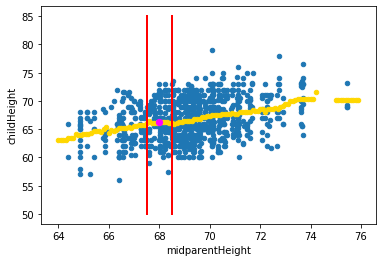

In [37]:
galton = pd.read_csv('https://raw.githubusercontent.com/abby621/cs1070_materials/master/fl2019/demos/galton.csv')

def predict_child(midparent):
  close_points_mask = galton['midparentHeight'].between(midparent-.5, midparent+.5)
  close_points_df = galton[close_points_mask]
  predicted_height = close_points_df['childHeight'].mean()
  return predicted_height

predicted_heights = []
for mp_height in np.arange(64,76,0.1):
    predicted_height = predict_child(mp_height)
    predicted_heights.append((mp_height, predicted_height))

predicted_heights_df = pd.DataFrame(data=predicted_heights,columns=['midparentHeight','childHeight'])

ax = galton.plot.scatter('midparentHeight','childHeight')
predicted_heights_df.plot.scatter('midparentHeight','childHeight',ax=ax,color='gold')
_ = plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plt.scatter(68, 66.24, color='magenta', s=40)

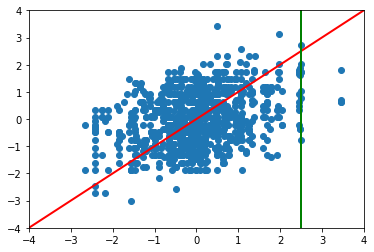

In [41]:
# how do we get a line that doesn't wobble up and down so much?
standard_midpartent_heights = standard_units(galton['midparentHeight'])
standard_child_heights = standard_units(galton['childHeight'])

plt.scatter(standard_midpartent_heights,standard_child_heights)
plt.xlim(-4,4)
plt.ylim(-4,4)
# draw a line with slope = 1
plt.plot([-4,4],[-4,4], color='r',lw=2)

# draw a line at an x-value i want to predict
plt.plot([2.5,2.5],[-4,4],color='g',lw=2)

# does the red line look like a good prediction line for this plot?
# not really! we'd expect the red line to intersect at the mean of those points

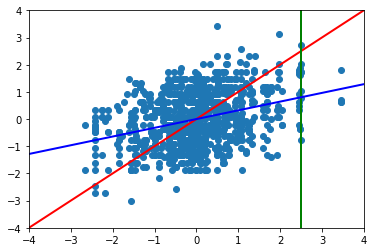

In [42]:
# how do we get a line that doesn't wobble up and down so much?
plt.scatter(standard_midpartent_heights,standard_child_heights)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot([-4,4],[-4,4], color='r',lw=2)
plt.plot([2.5,2.5],[-4,4],color='g',lw=2)

# draw a line with slope = r!
r = correlation(galton['midparentHeight'],galton['childHeight'])
plt.plot([-4,4],[-4*r,4*r], color='b',lw=2)

# that's our linear regression line!

In [43]:
# we can use this to make predictions _in standard units_
# how do we get it back to inches?

# compute the mean and standard deviation of both variables
parent_mean = np.mean(galton['midparentHeight'])
parent_sd = np.std(galton['midparentHeight'])
child_mean = np.mean(galton['childHeight'])
child_sd = np.std(galton['childHeight'])


def predict_with_r(parent):
    # normalize the parent height 
    parent_su = (parent - parent_mean) / parent_sd
    child_su = r * parent_su
    return child_su * child_sd + child_mean

predict_with_r(68)

65.97678154351429